In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn (2).csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4447,7821-DPRQE,Male,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,107.70,7320.9,No
5416,8961-QDZZJ,Female,0,Yes,Yes,57,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Electronic check,95.00,5535.8,No
1872,9938-PRCVK,Female,0,Yes,Yes,41,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.70,804.25,No
4350,1518-OMDIK,Male,0,Yes,No,33,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.55,1462.6,No
4316,8413-YNHNV,Male,0,No,No,69,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,90.65,6322.1,No


# About data

**The Telco customer churn data** contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

## What's customer churn
Customer churn is the number of customers that stopped using your company's product or service during a certain time frame.

You can calculate churn rate by dividing the number of customers you lost during that time period -- say a quarter -- by the number of customers you had at the beginning of that time period.

For example, if you start your quarter with 400 customers and end with 380, your churn rate is 5% because you lost 5% of your customers.



# Data Exploration

In [ ]:
df.shape # 7043 rows , 21 Fetures

(7043, 21)

In [ ]:
df.isna().sum() # Check missing value

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes # Check column's data type

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# I think customer ID is useless so, i'll remove it
df.drop(['customerID'], axis=1, inplace=True)

In [ ]:
df.TotalCharges # this should be numeric data

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [ ]:
# pd.to_numeric(df['TotalCharges'], errors='raise')

In [ ]:
pd.to_numeric(df['TotalCharges'], errors='coerce') # If ‘coerce’, then invalid parsing will be set as NaN.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()].shape
# find the rows that TotalCharges is NA
# around 0.16 % of all data

(11, 20)

In [ ]:
df.iloc[488]['TotalCharges']
# You will see TotalCharges col at the index 488 is blank

' '

# Imputation

Option to handle this
- Drop the row that totalcharges col have ' '
- Impute it by central tendency
- Impute it by regression

In [ ]:
df.TotalCharges = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# i think it's ok for data's around 0.16% will be dropped
df1 = df.copy()
df1.dropna(inplace=True)

In [ ]:
df1.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df1.Churn.value_counts() # No 5,163 person, Yes 1,869

No     5163
Yes    1869
Name: Churn, dtype: int64

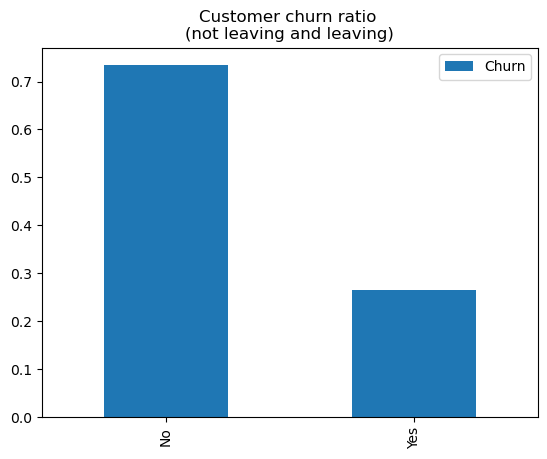

In [ ]:
(df1.Churn.value_counts(normalize=True)).plot.bar()
plt.title('Customer churn ratio \n(not leaving and leaving)')
plt.legend();

In [ ]:
df[df.Churn == 'No'].sample().T # sample the customer who no churn for view some attribute

,3222
gender,Male
SeniorCitizen,0
Partner,No
Dependents,No
tenure,2
PhoneService,Yes
MultipleLines,No
InternetService,DSL
OnlineSecurity,No
OnlineBackup,No


The girl has stayed with the company for 12 months and paying bill month-to-month ($19.45) by bank transfer (automatic) so far she's not leaving :D

In [ ]:
churn_yes = df1[df1.Churn == 'Yes']
churn_no = df1[df1.Churn == 'No']

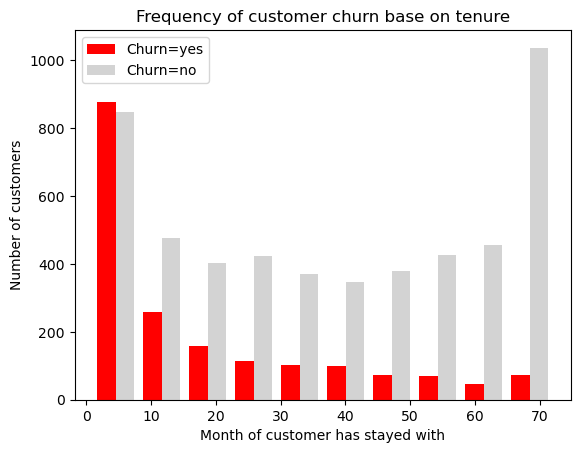

In [ ]:
plt.hist(x=[churn_yes.tenure, churn_no.tenure], label=['Churn=yes','Churn=no'], color=['red', 'lightgray'])
plt.title('Frequency of customer churn base on tenure')
plt.xlabel('Month of customer has stayed with')
plt.ylabel('Number of customers')
plt.legend();

you will see the trend of churn frequency -> more duration customer stay with it tends to make customer may be not leaving

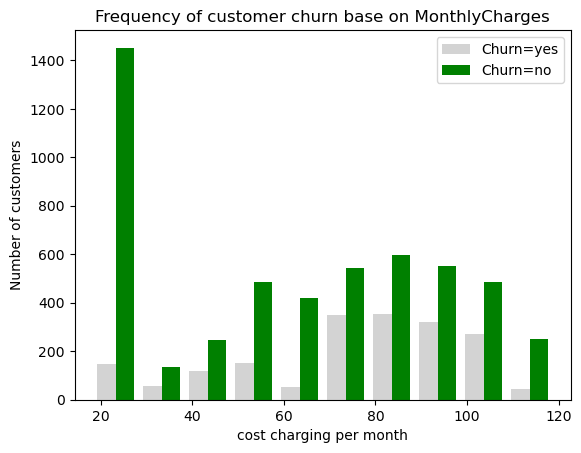

In [ ]:
# how about monthly charge ?
# like netflix increase your monthly charging
# oh noo, i'll never use it again so expensive.. just pretend haha :D
plt.hist(x=[churn_yes.MonthlyCharges, churn_no.MonthlyCharges], label=['Churn=yes','Churn=no'], color=['lightgray', 'green'])
plt.title('Frequency of customer churn base on MonthlyCharges')
plt.xlabel('cost charging per month')
plt.ylabel('Number of customers')
plt.legend();

cheaper cost of monthly charging 's significant it's around 14xx customers're not leaving

In [ ]:
churn_no[churn_no.MonthlyCharges < 30].shape[0]

1485

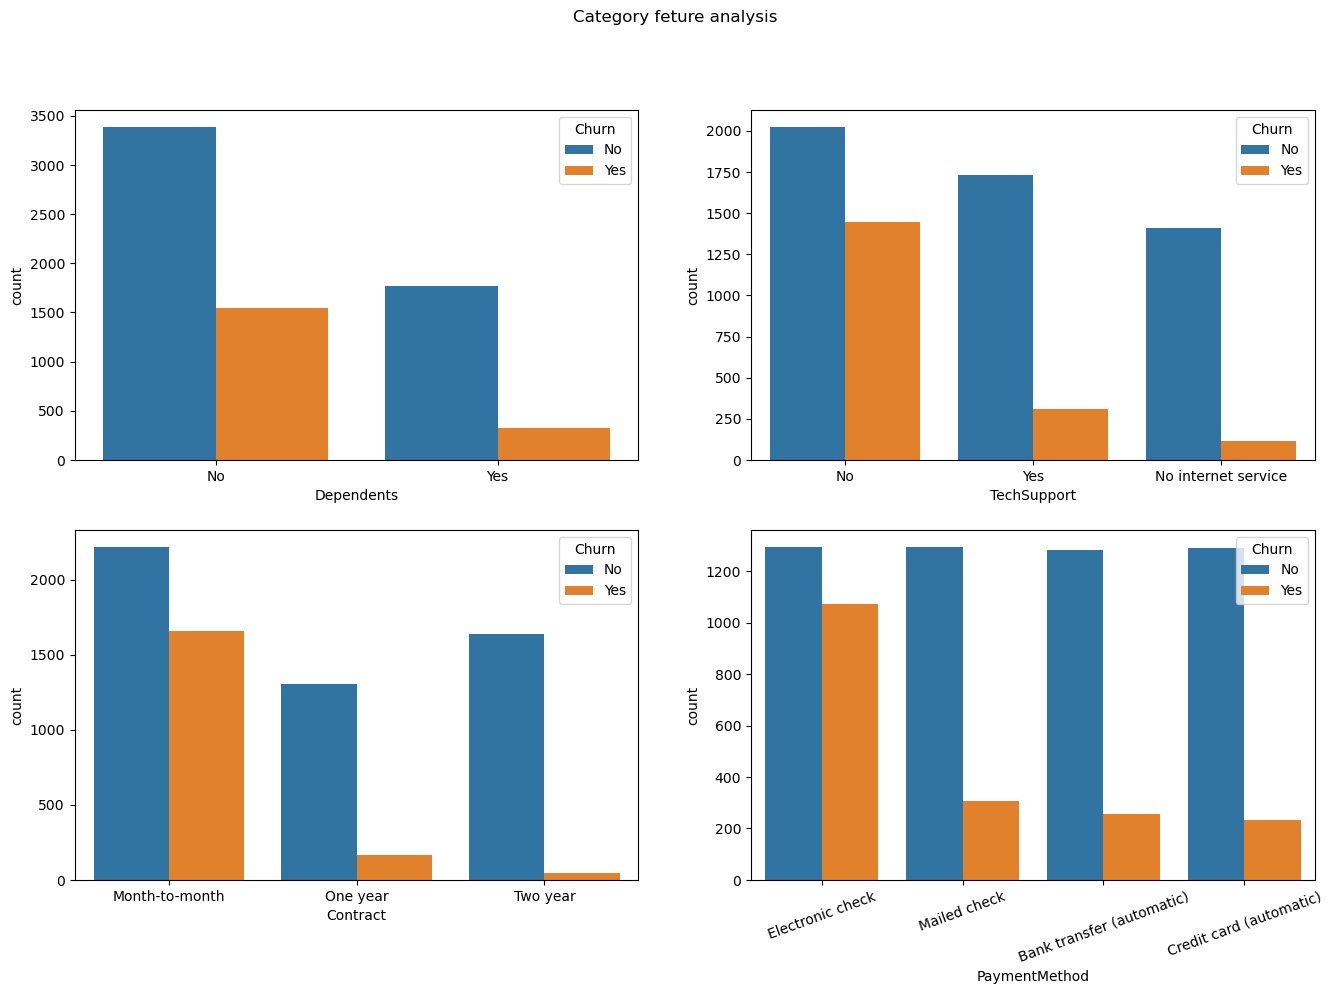

In [ ]:
col_sel = ['Dependents', 'TechSupport', 'Contract', 'PaymentMethod']
idx=0
fig, ax = plt.subplots(2, 2, figsize=(16,10))
for row in range(2):
    for col in range(2):
        sns.countplot(
            data=df1,
            ax=ax[row, col],
            x=col_sel[idx],
            hue='Churn'
        )
        idx+=1

ax[1,1].tick_params(axis='x', labelrotation=20)
plt.suptitle('Category feture analysis');

`These feture are interesting`
it's just a random pick feture and i think firstly should view correlation before visualizing. picking only important feature, as you see a lot of columns have 'yes' and 'no' value so i'll find the correlation of all feature after i encode it (label or oneHot)


In [ ]:
# find class each column
def see_unique_obj_col():
    for col_name in df1.columns:
        print(f'{col_name}: {df1[col_name].unique()}')

see_unique_obj_col()

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

# Data preprocessing

## Feature engineering

In [ ]:
# Grouping some value in the same or similar meaning for eliminating redundancy
# see df.unique() above for replace it

df1.replace({'No phone service': 'No'}, inplace=True)

df1.replace({'No internet service': 'No'}, inplace=True)

In [ ]:
see_unique_obj_col()

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: ['No' 'Yes']


because computer doesn't understand text which only know 0 & 1 so, next step i'll encode it to make machine has understood the data

In [ ]:
# categorized to 0 , 1 for 2 features
df1.replace({'No': 0, 'Yes': 1}, inplace=True)

df1.replace({'Female': 0, 'Male': 1}, inplace=True)

In [ ]:
see_unique_obj_col()

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1.InternetService.replace({0: 'No'}, inplace=True)

In [ ]:
col_tf = df1.select_dtypes('O').keys().values

# Label encoding (OneHot)

In [ ]:
# For over 2 class I'll use OneHotEncode instead of 0 and 1
from sklearn.preprocessing import OneHotEncoder

oen = OneHotEncoder()
oen.fit(df1[col_tf])

OneHotEncoder()

In [ ]:
oen.categories_

[array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object)]

In [ ]:
name_tf_col = np.concatenate(
    (oen.categories_[0],
    oen.categories_[1],
    oen.categories_[2])
)

In [ ]:
name_tf_col

array(['DSL', 'Fiber optic', 'No', 'Month-to-month', 'One year',
       'Two year', 'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [ ]:
pd.DataFrame(oen.transform(df1[col_tf]).toarray(), columns=name_tf_col).tail()

,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
7027,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7028,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7029,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7030,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7031,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df1[col_tf].tail() # notice index name not match becuase i drop 'na' row

,InternetService,Contract,PaymentMethod
7038,DSL,One year,Mailed check
7039,Fiber optic,One year,Credit card (automatic)
7040,DSL,Month-to-month,Electronic check
7041,Fiber optic,Month-to-month,Mailed check
7042,Fiber optic,Two year,Bank transfer (automatic)


In [ ]:
cat_hot_tf = pd.DataFrame(oen.transform(df1[col_tf]).toarray(), columns=name_tf_col)

In [ ]:
cat_hot_tf.shape

(7032, 10)

In [ ]:
df_tf = df1.copy() # just backing up

In [ ]:
df_tf.drop(col_tf, axis=1, inplace=True) # drop unencode col to fill the new tf

In [ ]:
df_tf.reset_index(inplace=True)
# reset index to match index name with cat_hot_tf before joining
# otherwise reset_index() will fill with NaN

In [ ]:
df_tf = df_tf.join(cat_hot_tf)

In [ ]:
df_tf = df_tf.drop('index', axis=1)

In [ ]:
df_tf.shape

(7032, 27)

In [ ]:
df_tf.dtypes # ensure all feature become numeric data

gender                         int64
SeniorCitizen                  int64
Partner                        int64
Dependents                     int64
tenure                         int64
PhoneService                   int64
MultipleLines                  int64
OnlineSecurity                 int64
OnlineBackup                   int64
DeviceProtection               int64
TechSupport                    int64
StreamingTV                    int64
StreamingMovies                int64
PaperlessBilling               int64
MonthlyCharges               float64
TotalCharges                 float64
Churn                          int64
DSL                          float64
Fiber optic                  float64
No                           float64
Month-to-month               float64
One year                     float64
Two year                     float64
Bank transfer (automatic)    float64
Credit card (automatic)      float64
Electronic check             float64
Mailed check                 float64
d

=== DONE Label Enconding ===

# Feture scaling
numeric data
- Standardizing
- Normailizing

In [ ]:
df_tf[:1].T

,0
gender,0.00
SeniorCitizen,0.00
Partner,1.00
Dependents,0.00
tenure,1.00
PhoneService,0.00
MultipleLines,0.00
OnlineSecurity,0.00
OnlineBackup,1.00
DeviceProtection,0.00


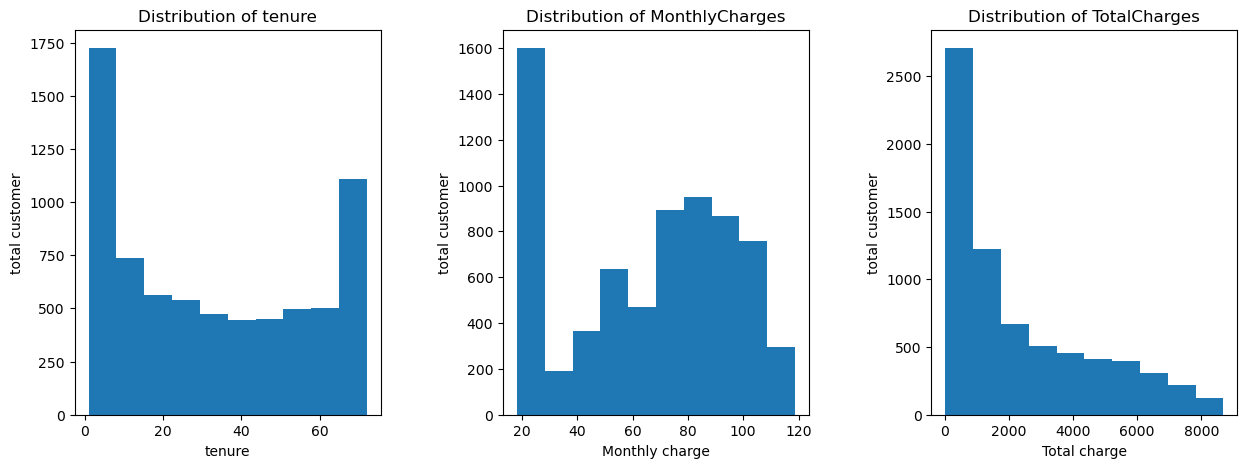

In [ ]:
# I'll explore the data distribution of MonthlyCharges, TotalCharges column
fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.subplots_adjust(wspace=0.4)
ax[0].hist(df_tf.tenure)
ax[1].hist(df_tf.MonthlyCharges)
ax[2].hist(df_tf.TotalCharges)

ax[0].set_title('Distribution of tenure')
ax[0].set_xlabel('tenure')
ax[0].set_ylabel('total customer')

ax[1].set_title('Distribution of MonthlyCharges')
ax[1].set_xlabel('Monthly charge')
ax[1].set_ylabel('total customer')

ax[2].set_title('Distribution of TotalCharges')
ax[2].set_xlabel('Total charge')
ax[2].set_ylabel('total customer');

#### Tenure is like Uniform dist.,  MonthlyCharges mode at the left, TotalCharges has right skewness

Check outlier

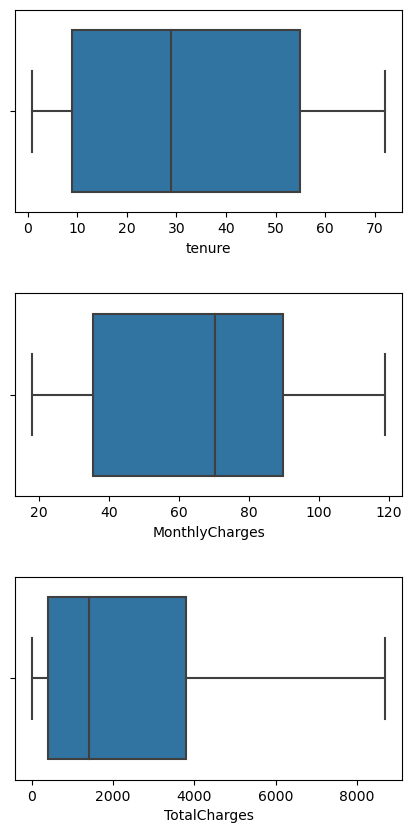

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(5,10))
fig.subplots_adjust(hspace=0.4)
sns.boxplot(data=df_tf, x='tenure', ax=ax[0])
sns.boxplot(data=df_tf, x='MonthlyCharges', ax=ax[1])
sns.boxplot(data=df_tf, x='TotalCharges', ax=ax[2]);

## Standardized

In [ ]:
num_std_col = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(df_tf[num_std_col])

StandardScaler()

In [ ]:
sc.transform(df_tf[num_std_col]) # this is for DataFrame tf > 1 cols
# if your input data is series or array (and fit for 1 col) you need to reshape it to (-1, 1)
# but this case i fit 2 columns into model scaler it require 2 fetures tranforms

array([[-1.28024804, -1.16169394, -0.99419409],
       [ 0.06430269, -0.26087792, -0.17373982],
       [-1.23950408, -0.36392329, -0.95964911],
       ...,
       [-0.87280842, -1.17000405, -0.85451414],
       [-1.15801615,  0.31916782, -0.87209546],
       [ 1.36810945,  1.35793167,  2.01234407]])

In [ ]:
ml_series = df_tf['MonthlyCharges']
ml_series

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7027     84.80
7028    103.20
7029     29.60
7030     74.40
7031    105.65
Name: MonthlyCharges, Length: 7032, dtype: float64

In [ ]:
ml_series.values.reshape(-1,1) # like this

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [ ]:
col_sc = pd.DataFrame(sc.transform(df_tf[num_std_col]), columns=num_std_col)
col_sc

,tenure,MonthlyCharges,TotalCharges
0,-1.280248,-1.161694,-0.994194
1,0.064303,-0.260878,-0.173740
2,-1.239504,-0.363923,-0.959649
3,0.512486,-0.747850,-0.195248
4,-1.239504,0.196178,-0.940457
...,...,...,...
7027,-0.343137,0.664868,-0.129180
7028,1.612573,1.276493,2.241056
7029,-0.872808,-1.170004,-0.854514
7030,-1.158016,0.319168,-0.872095


In [ ]:
df_tf.drop(num_std_col, axis=1, inplace=True)

In [ ]:
df_tf = df_tf.join(col_sc)

In [ ]:
df_tf[:1].T

,0
gender,0.000000
SeniorCitizen,0.000000
Partner,1.000000
Dependents,0.000000
PhoneService,0.000000
MultipleLines,0.000000
OnlineSecurity,0.000000
OnlineBackup,1.000000
DeviceProtection,0.000000
TechSupport,0.000000


MonthlyCharges , TotalCharges Feture have standardized !

let's plot distribution again

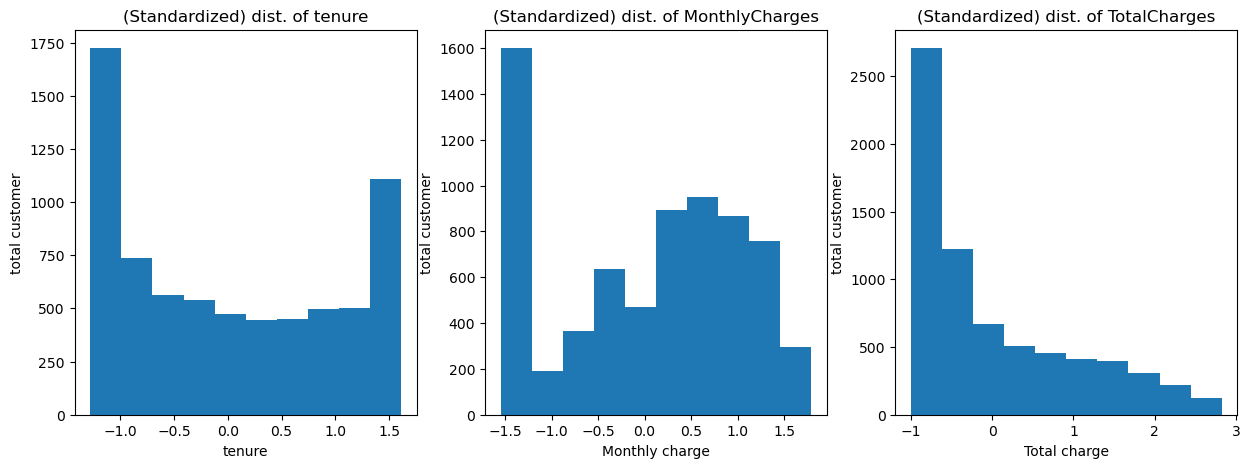

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].hist(df_tf.tenure)
ax[1].hist(df_tf.MonthlyCharges)
ax[2].hist(df_tf.TotalCharges)

ax[0].set_title('(Standardized) dist. of tenure')
ax[0].set_xlabel('tenure')
ax[0].set_ylabel('total customer')

ax[1].set_title('(Standardized) dist. of MonthlyCharges')
ax[1].set_xlabel('Monthly charge')
ax[1].set_ylabel('total customer')

ax[2].set_title('(Standardized) dist. of TotalCharges')
ax[2].set_xlabel('Total charge')
ax[2].set_ylabel('total customer');

before move to modelling further analyzing about statistic

In [ ]:
df_tf.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03,7.032000e+03
mean,0.504693,0.162400,0.482509,0.298493,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,...,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,-1.126643e-16,6.062651e-17,-1.119064e-16
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,...,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.280248e+00,-1.547283e+00,-9.990692e-01
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.542963e-01,-9.709769e-01,-8.302488e-01
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.394171e-01,1.845440e-01,-3.908151e-01
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.199259e-01,8.331482e-01,6.668271e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.612573e+00,1.793381e+00,2.824261e+00


In [ ]:
df_tf.corr()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,-0.008507,...,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.142996,-0.038576,0.066663,0.059514,-0.060577,...,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142561,0.143346,0.141849,0.153556,0.120206,...,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024307,0.080786,0.023639,0.013900,0.063053,...,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,0.279530,-0.091676,-0.052133,-0.070076,-0.095138,...,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,0.007877,0.248033,0.113008
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.279530,1.000000,0.098592,0.202228,0.201733,0.100421,...,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672,0.332399,0.490912,0.469042
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,-0.091676,0.098592,1.000000,0.283285,0.274875,0.354458,...,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918,0.328297,0.296447,0.412619
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,-0.052133,0.202228,0.283285,1.000000,0.303058,0.293705,...,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075,0.361138,0.441529,0.510100
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,-0.070076,0.201733,0.274875,0.303058,1.000000,0.332850,...,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325,0.361520,0.482607,0.522881
TechSupport,-0.008507,-0.060577,0.120206,0.063053,-0.095138,0.100421,0.354458,0.293705,0.332850,1.000000,...,-0.285491,0.096258,0.240924,0.100472,0.117024,-0.114807,-0.084631,0.325288,0.338301,0.432868


In [ ]:
# rand pick it take too much time for run all feature
pair_col = [
    'SeniorCitizen',
    'Dependents',
    'Partner',
    'TechSupport',
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Churn'
]

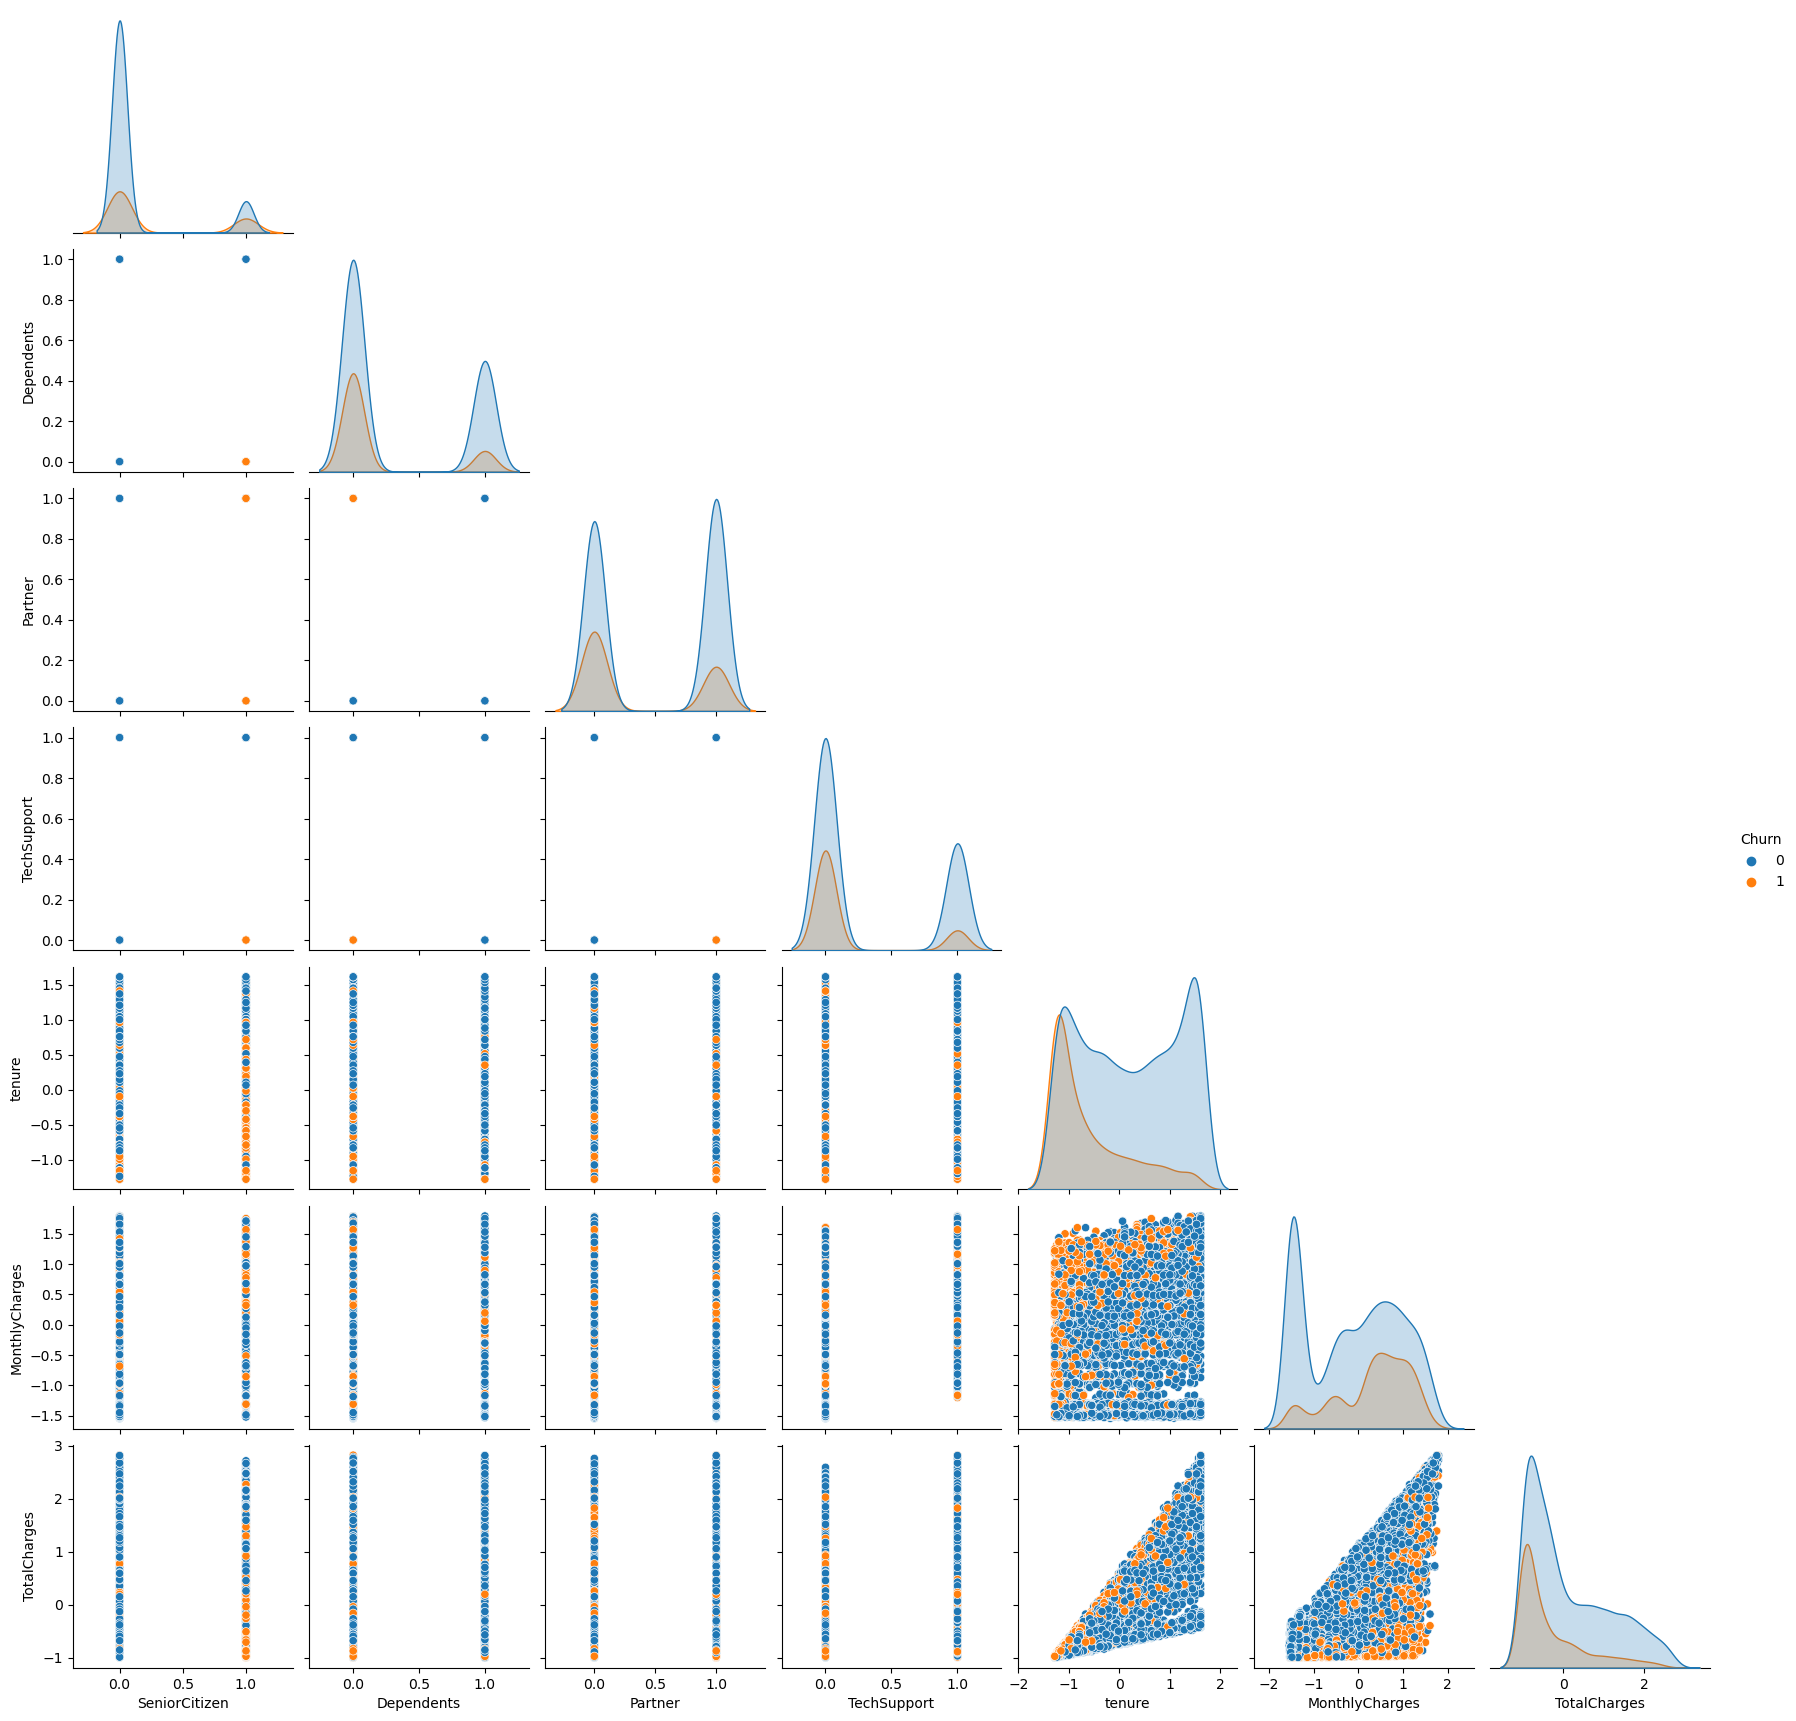

In [ ]:
sns.pairplot(df_tf[pair_col], corner=True, hue='Churn')

<Axes: >

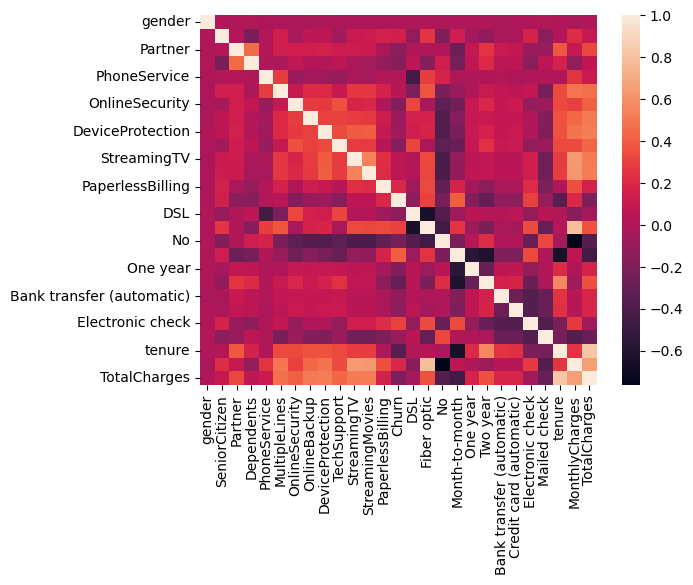

In [ ]:
sns.heatmap(
    df_tf.corr()
)

# Modeling

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
print(tf.__version__)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

2.12.0


In [ ]:
X = df_tf.drop('Churn', axis=1)
y = df_tf['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(26, )), # input
        tf.keras.layers.Dense(20, activation='ReLU'), # hidden
        tf.keras.layers.Dense(1, activation='sigmoid') # output
    ]
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# default batch_size = 32
model.fit(
    X_train,
    y_train,
    epochs=100
)


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5210 - accuracy: 0.7271
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7920
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8012
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8036
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8069
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8094
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4077 - accura

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.7896


[0.44033825397491455, 0.7896233201026917]

In [ ]:
pred_y = model.predict(X_test)

44/44 [==============================] - 0s 1ms/step


In [ ]:
pred_y # 2D array

array([[0.00418388],
       [0.07911765],
       [0.75398785],
       ...,
       [0.07090676],
       [0.25213936],
       [0.00398504]], dtype=float32)

In [ ]:
y_dim = pred_y.reshape(1, -1)[0] # reshape to 1D array
y_dim

array([0.00418388, 0.07911765, 0.75398785, ..., 0.07090676, 0.25213936,
       0.00398504], dtype=float32)

In [ ]:
y_pred_con = [1 if x > 0.5 else 0 for x in y_dim]

In [ ]:
y_pred_con[:5]

[0, 0, 1, 0, 0]

# Evaluation



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_con))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.65      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



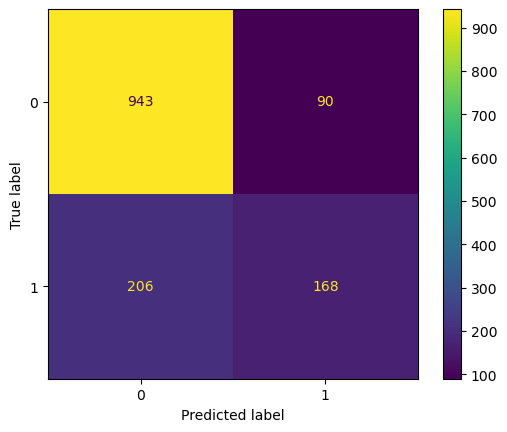

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_con)).plot()

**Accuracy**

In [ ]:
round((913+192)/(913+120+182+192), 2) # Accuracy

0.79

**Precision**

In [ ]:
round(913/(913+182), 2) # precision of pred_0 (TN / TN + FN)

0.83

In [ ]:
round(192/(192+120), 2) # precision of pred_1 (TP/TP + FP)

0.62

**Recall**
- Recall is a measure of how many of the being true of case N that classifier correctly predicted, over all data being predicted to N

ex. case 0
predict 0 (true) = 20 <br/>
predict 1 (but actual is false) =10  <br/>
total actual 0 (true_label) = 20+10 <br/>
So, recall = 20 / 30 <br/>

In [ ]:
round(913/(913+120), 2) # recall 0 ( TN / TN + FP)
# True predict N/ (total predict N)
# ex. true pred 0 (913) / total_pred 0 (913 + 120)

0.88

In [ ]:
round(192/(192+182), 2) # recall 1

0.51

**F1-score**

In [ ]:
# 2*precision*recall/(precision + recall)
round(2*(913/(913+182))*(913/(913+120))/((913/(913+182))+(913/(913+120))),2 )

0.86